# Amazon Web Services - Use Case 1

# Banking data set


In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn 

  Using cached pip-20.3.3-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.3
    Uninstalling pip-20.3:
      Successfully uninstalled pip-20.3
     |████████████████████████████████| 22.2 MB 13.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [2]:
import numpy as np                                
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime                 
import sys                                        
import math                                       
import json
import boto3
import sagemaker

bucket = sagemaker.Session().default_bucket()
prefix = 'sagemaker/fifa19'
role = sagemaker.get_execution_role()

print('Bucket:\n{}'.format(bucket))


Bucket:
sagemaker-us-east-1-281122744250


In [109]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_excel('default of credit card clients.xls', header=1)

print('The shape of the training dataset is:', df.shape)

The shape of the training dataset is: (30000, 25)


## 2. <a name="2">Exploratory Data Analysis</a>
(<a href="#0">Go to top</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [110]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,others,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [111]:
print('The shape of the dataset is:', df.shape) 


The shape of the dataset is: (30000, 25)


In [112]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,male,graduate school,single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,male,graduate school,single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,female,university,single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,female,others,married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,male,high school,single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [113]:
# Let's see the data types and non-null values for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [114]:
# This will print basic statistics for numerical columns
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Target distribution

Let's check our target distribution.

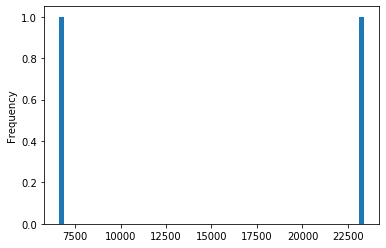

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

df['default payment next month'].value_counts().plot.hist(bins=70)
plt.show()


In [117]:
df['default payment next month'].head(2)

0    1
1    1
Name: default payment next month, dtype: int64

In [118]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [119]:
# Number of unique elements in dataset
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         5
MARRIAGE                          3
AGE                              63
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [120]:
# What columns are in dataset?
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

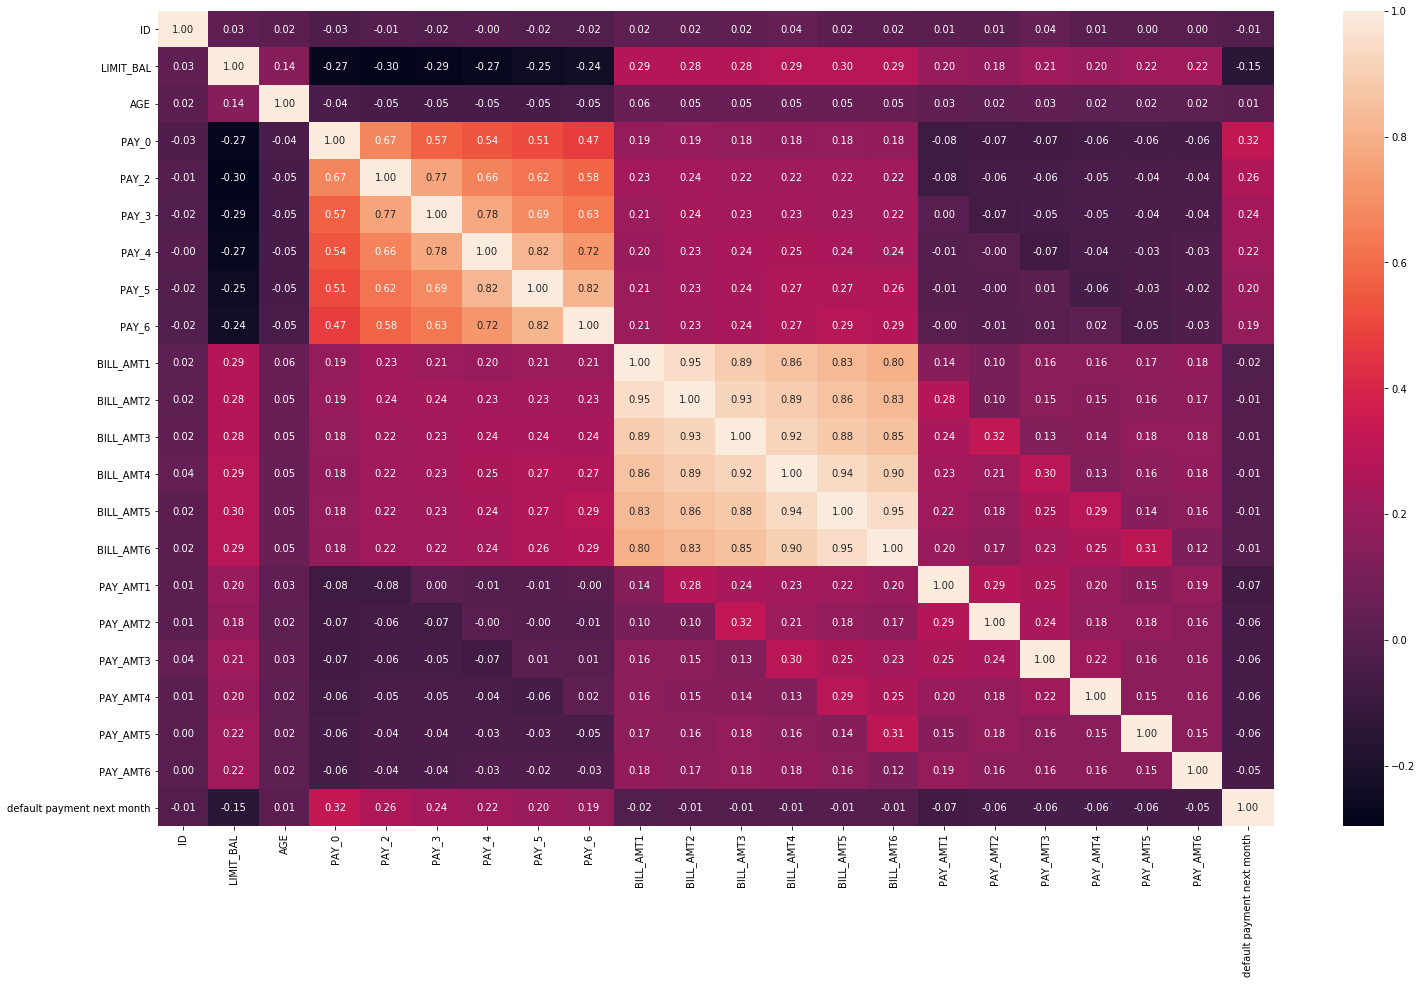

In [121]:
# Display correlation after removing correlated features
import matplotlib.pyplot as plt
import seaborn as sns

#f, ax = plt.subplots(figsize=(32, 26))

plt.figure(figsize = (25,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f")


In [125]:
numeric_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
'BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
'LIMIT_BAL']

text_categorical_features =  ['SEX', 'EDUCATION']

numeric_categorical_features =  ['AGE']

non_useful_features = ['ID']

label_feature = ['default payment next month']

In [126]:
df[numeric_features].head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL
0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,20000
1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,120000
2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,90000
3,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,50000
4,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,50000


In [127]:
df[text_categorical_features].nunique()

SEX          2
EDUCATION    5
dtype: int64

In [128]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [24]:
#drop non necessary columns
#dfc.drop(features_drop, axis=1, inplace=True)
#dfc_t.drop(features_drop, axis=1, inplace=True)

In [129]:
all_features = numeric_features + text_categorical_features + numeric_categorical_features + label_feature

In [130]:
label = 'default payment next month'

In [131]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [132]:
df[all_features].head(10)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL,SEX,EDUCATION,AGE,default payment next month
0,2,2,-1,-1,-2,-2,3913,3102,689,0,...,689,0,0,0,0,20000,female,university,24,1
1,-1,2,0,0,0,2,2682,1725,2682,3272,...,1000,1000,1000,0,2000,120000,female,university,26,1
2,0,0,0,0,0,0,29239,14027,13559,14331,...,1500,1000,1000,1000,5000,90000,female,university,34,0
3,0,0,0,0,0,0,46990,48233,49291,28314,...,2019,1200,1100,1069,1000,50000,female,university,37,0
4,-1,0,-1,0,0,0,8617,5670,35835,20940,...,36681,10000,9000,689,679,50000,male,university,57,0
5,0,0,0,0,0,0,64400,57069,57608,19394,...,1815,657,1000,1000,800,50000,male,graduate school,37,0
6,0,0,0,0,0,0,367965,412023,445007,542653,...,40000,38000,20239,13750,13770,500000,male,graduate school,29,0
7,0,-1,-1,0,0,-1,11876,380,601,221,...,601,0,581,1687,1542,100000,female,university,23,0
8,0,0,2,0,0,0,11285,14096,12108,12211,...,0,432,1000,1000,1000,140000,female,others,28,0
9,-2,-2,-2,-2,-1,-1,0,0,0,0,...,0,0,13007,1122,0,20000,male,high school,35,0


In [133]:
print('Numerical categorial columns:', df[numeric_categorical_features].select_dtypes(include=np.number).columns)
print('Numerical            columns:', df[numeric_features].select_dtypes(include=np.number).columns)
print('Text   Categorical columns:',df[text_categorical_features].select_dtypes(include='object').columns)

Numerical categorial columns: Index(['AGE'], dtype='object')
Numerical            columns: Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'LIMIT_BAL'],
      dtype='object')
Text   Categorical columns: Index(['SEX', 'EDUCATION'], dtype='object')


Text(0.5, 1, 'dataset correlation')

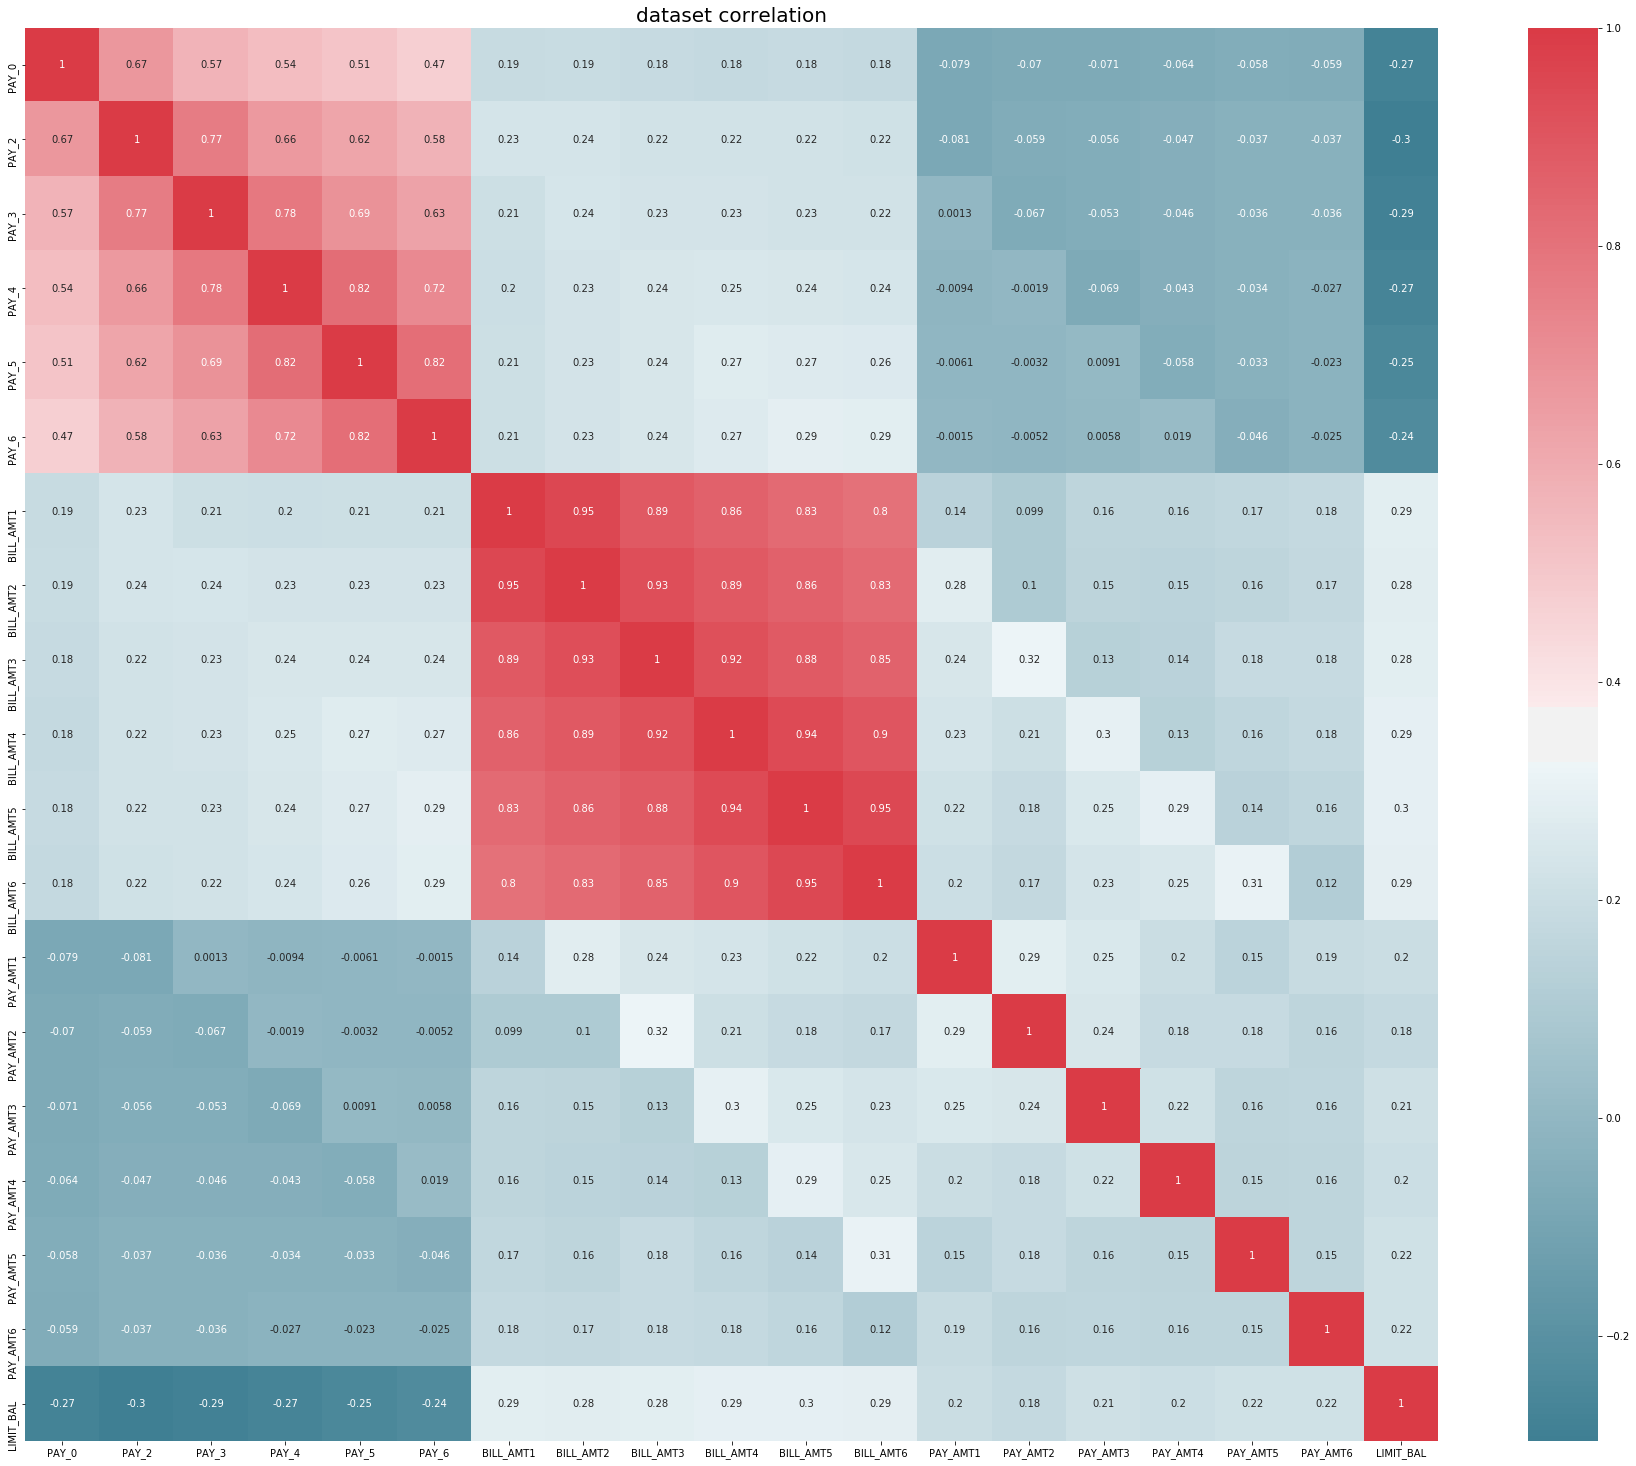

In [134]:
# Display correlation after removing correlated features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = df[numeric_features].corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

#### checking for numerical features outliers

In [135]:
for c in numeric_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))

PAY_0
(-2.0109999999999997, -1.0]     8445
(-1.0, 0.0]                    14737
(0.0, 1.0]                      3688
(1.0, 2.0]                      2667
(2.0, 3.0]                       322
(3.0, 4.0]                        76
(4.0, 5.0]                        26
(5.0, 6.0]                        11
(6.0, 7.0]                         9
(7.0, 8.0]                        19
Name: PAY_0, dtype: int64
PAY_2
(-2.0109999999999997, -1.0]     9832
(-1.0, 0.0]                    15730
(0.0, 1.0]                        28
(1.0, 2.0]                      3927
(2.0, 3.0]                       326
(3.0, 4.0]                        99
(4.0, 5.0]                        25
(5.0, 6.0]                        12
(6.0, 7.0]                        20
(7.0, 8.0]                         1
Name: PAY_2, dtype: int64
PAY_3
(-2.0109999999999997, -1.0]    10023
(-1.0, 0.0]                    15764
(0.0, 1.0]                         4
(1.0, 2.0]                      3819
(2.0, 3.0]                       240
(3.0,

Let's check missing values for these numerical features.

In [136]:
print(df[numeric_features].isna().sum())

PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
LIMIT_BAL    0
dtype: int64


#### Cleaning categorical features 

Let's also examine the categorical features.

In [137]:
for c in text_categorical_features:
    print(c)
    print(df[c].unique()) 

SEX
['female' 'male']
EDUCATION
['university' 'graduate school' 'others' 'high school' nan 0]


In [138]:
df[text_categorical_features] = df[text_categorical_features].astype('str')

In [139]:
df[numeric_categorical_features] = df[numeric_categorical_features].astype('str')

In [140]:
df[numeric_features] = df[numeric_features].astype('float32')

In [145]:
df[label_feature] = df[label_feature].astype('int')

In [146]:
df['default payment next month'].head(2)

0    1
1    1
Name: default payment next month, dtype: int64

A way to handle the booleans is to convert them to strings by changing the type of all categoricals to 'str'. This will also affect the nans, basically performing imputation of the nans with a 'nans' placeholder value! 

Applying the type conversion to both categoricals and text features, takes care of the nans in the text fields as well. In case other imputations are planned for the categoricals and/or test fields, notice that the masking shown above leaves the nans unchanged.

df[boolean_features] = df[boolean_features].astype('str')

Converting categoricals into useful numerical features, will also have to wait until after the train/test split.

#### Cleaning text features 

Also a good idea to look at the text fields. Text cleaning can be performed here, before train/test split, with less code.

We dont have text in this dataset but we will use date_features to show the functions.

## 4. <a name="4">Training and test datasets</a>
(<a href="#0">Go to top</a>)

We split our dataset into training (90%) and test (10%) subsets using sklearn's [__train_test_split()__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [147]:
df = df[pd.notnull(df[label_feature])]

In [148]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df[all_features], test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)


## 5. <a name="5">Data processing with Pipeline and ColumnTransformer</a>
(<a href="#0">Go to top</a>)

Let's build a more complex pipeline today. We first build separate pipelines to handle the numerical, categorical, and text features, and then combine them into a composite pipeline along with an estimator, a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) here.

   * For the numerical features pipeline, the __numerical_processor__ below, we impute missing values with the mean using sklearn's SimpleImputer, followed by a MinMaxScaler (don't have to scale features when using Decision Trees, but it's a good idea to see how to use more data transforms). If different processing is desired for different numerical features, different pipelines should be built - just like shown below for the two text features.
   
   
   * In the categoricals pipeline, the __categorical_processor__ below, we impute with a placeholder value (no effect here as we already encoded the 'nan's), and encode with sklearn's OneHotEncoder. If computing memory is an issue, it is a good idea to check categoricals' unique values, to get an estimate of many dummy features will be created by one-hot encoding. Note the __handle_unknown__ parameter that tells the encoder to ignore (rather than throw an error for) any unique value that might show in the validation/and or test set that was not present in the initial training set.
   
   
The selective preparations of the dataset features are then put together into a collective ColumnTransformer, to be finally used in a Pipeline along with an estimator. This ensures that the transforms are performed automatically on the raw data when fitting the model and when making predictions, such as when evaluating the model on a validation dataset via cross-validation or making predictions on a test dataset in the future.

In [156]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LinearRegression

### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
#    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='nan')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Preprocess 1st text feature
#text_processor_0 = Pipeline([
 #   ('text_vect_0', CountVectorizer(binary=True, max_features=50))
#])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
('numerical_pre', numerical_processor, numeric_features),
('categorical_pre', categorical_processor, (text_categorical_features + numeric_categorical_features)),]) 

### PIPELINE ###
################

# Pipeline desired all data transformers, along with an estimator at the end
# Later you can set/reach the parameters using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline([
   ('data_preprocessing', data_preprocessor),
   ('dt', RandomForestClassifier(max_depth=10, random_state=0))
                    ])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'LIMIT_BAL']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='nan',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SEX', 'EDUCATION',
                                                   'AGE'])])),
                ('dt', RandomForestClassifier(max_depth=10, random_state=0))])

## 6. <a name="6">Train and tune a classifier</a>
(<a href="#0">Go to top</a>)

Let's first train and test the above composite pipeline on the train and the test sets.  

In [158]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[numeric_features + text_categorical_features + numeric_categorical_features]
y_train = train_data[label]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))


# Get test data to test the pipeline
X_test = test_data[numeric_features + text_categorical_features + numeric_categorical_features]
y_test = test_data[label]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
#print(confusion_matrix(y_test, test_predictions))
#print(classification_report(y_test, test_predictions))
#print("Accuracy (test):", accuracy_score(y_test, test_predictions))

#sb.regplot(y_train, train_predictions, scatter_kws={'alpha':1, 'color':'y'})
#plt.xlabel('Actual default payment next month')
#plt.ylabel('Predicted default payment next month')
#plt.show()

#sb.regplot(y_test, test_predictions, scatter_kws={'alpha':0.3, 'color':'y'})
#plt.xlabel('Actual default payment next month')
#plt.ylabel('Predicted default payment next month')
#plt.show()

[[18657     0]
 [ 5343     0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     18657
           1       0.00      0.00      0.00      5343

    accuracy                           0.78     24000
   macro avg       0.39      0.50      0.44     24000
weighted avg       0.60      0.78      0.68     24000

Accuracy (training): 0.777375
